<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Brain-tumor-detection/blob/master/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

#Importing a Kaggle dataset to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:

!wget -c https://www.google.com/url?q=https://openneuro.org/crn/datasets/ds001784/snapshots/1.1.2/download&sa=D&source=hangouts&ust=1585471383942000&usg=AFQjCNEnaRqi7l7h3woEBvUn9sXxrQzSzw

--2020-07-01 05:37:47--  https://www.google.com/url?q=https://openneuro.org/crn/datasets/ds001784/snapshots/1.1.2/download
Resolving www.google.com (www.google.com)... 74.125.128.147, 74.125.128.103, 74.125.128.104, ...
Connecting to www.google.com (www.google.com)|74.125.128.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?q=https:%2F%2Fopenneuro.org%2Fcrn%2Fdatasets%2Fds001784%2Fsnapshots%2F1.1.2%2Fdownload’

url?q=https:%2F%2Fo     [ <=>                ]   1.50K  --.-KB/s    in 0s      

2020-07-01 05:37:47 (34.8 MB/s) - ‘url?q=https:%2F%2Fopenneuro.org%2Fcrn%2Fdatasets%2Fds001784%2Fsnapshots%2F1.1.2%2Fdownload’ saved [1538]



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-29 17:04:40          84393  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14540  
josehenriqueroveda/fertilizers-by-product-fao               Fertilizers by Product FAO                            1MB  2020-06-16 13:01:07            349  
madeleineferguson/farmers-markets-in-the-united-states      Farmers Markets in the United States                816KB  2020-06-10 16:41:46            606  
promptcloud/jobs-on-naukricom                               Jobs

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:01, 5.95MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.4MB/s]


In [ ]:
!ls

 brain-mri-images-for-brain-tumor-detection.zip
 drive
 sample_data
'url?q=https:%2F%2Fopenneuro.org%2Fcrn%2Fdatasets%2Fds001784%2Fsnapshots%2F1.1.2%2Fdownload'


In [ ]:
! unzip brain-mri-images-for-brain-tumor-detection.zip

In [ ]:
!cp '/content/brain_tumor_dataset' -r '/content/drive/My Drive/MachineLearing'

#Preparing needed directories

In [8]:
import os, shutil

In [9]:
original_dataset_dir='/content/drive/My Drive/MachineLearing/brain_tumor_dataset'

base_dir='/content/drive/My Drive/MachineLearing/brain_tumor_dataset/brain_tumor_dataset_small'
# os.mkdir(base_dir) ## these comands(os.mkdir(...)) should be operated at first and never repeated again

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
# os.mkdir(test_dir)

train_yes_dir=os.path.join(train_dir,'yes')
# os.mkdir(train_yes_dir)

train_no_dir=os.path.join(train_dir,'no')
# os.mkdir(train_no_dir)

validation_yes_dir=os.path.join(validation_dir,'yes')
# os.mkdir(validation_yes_dir)

validation_no_dir=os.path.join(validation_dir,'no')
# os.mkdir(validation_no_dir)

test_yes_dir=os.path.join(test_dir,'yes')
# os.mkdir(test_yes_dir)

test_no_dir=os.path.join(test_dir,'no')
# os.mkdir(test_no_dir)



# Making data folders

In [ ]:
y_fnames = [i for i in os.listdir(original_dataset_dir + '/yes')]  
n_fnames = [i for i in os.listdir(original_dataset_dir + '/no')]  

##Lets have a look at images properties 

In [ ]:
import cv2 

In [ ]:
for fname in y_fnames[:len(y_fnames)]:
  #print(fname)
  im=cv2.imread(original_dataset_dir + '/yes/'+fname)
  print(im.shape)

(array([66381., 30405., 60354., 45102., 58047.,  8184.,  4872.,  2265.,
         2199., 11871.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

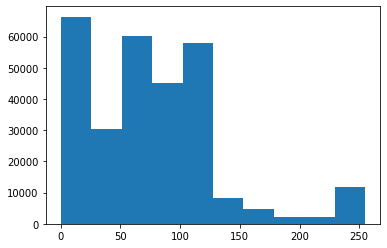

In [ ]:
plt.hist(im.reshape(-1))

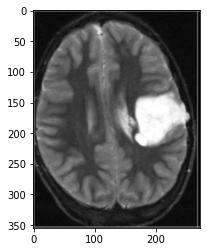

In [ ]:
plt.imshow(im)

# Random reading images

In [ ]:
rand_ind = np.random.permutation( len(n_fnames) )
n_fnames = [n_fnames[ ind ]  for ind in rand_ind]
n_fnames

#Copying images in directories. (it has been copied, don't operate it again!)

In [ ]:
import os, shutil

In [ ]:
for fname in n_fnames[:100]:
  src = os.path.join(original_dataset_dir+'/no', fname)
  dst = os.path.join(train_no_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in n_fnames[100:125]:
  src = os.path.join(original_dataset_dir+'/no', fname)
  dst = os.path.join(validation_no_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in n_fnames[125:154]:
  src = os.path.join(original_dataset_dir+'/no', fname)
  dst = os.path.join(test_no_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
rand_ind=np.random.permutation(len(y_fnames))
y_fnames=[y_fnames[ind] for ind in rand_ind]
#y_fnames

In [ ]:
for fname in y_fnames[:100]:
  src=os.path.join(original_dataset_dir+'/yes',fname)
  dst=os.path.join(train_yes_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
for fname in y_fnames[100:125]:
  src=os.path.join(original_dataset_dir+'/yes',fname)
  dst=os.path.join(validation_yes_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
for fname in y_fnames[125:155]:
  src=os.path.join(original_dataset_dir+'/yes',fname)
  dst=os.path.join(test_yes_dir,fname)
  shutil.copyfile(src,dst)

#Counting the number of images:

In [ ]:
print('NO images:',len(os.listdir(original_dataset_dir+'/no')))
print(' YES images:',len(os.listdir(original_dataset_dir+'/yes')))
print('total training YES images:',len(os.listdir(train_yes_dir)))
print('total validation YES images:',len(os.listdir(validation_yes_dir)))
print('total test YES images:',len(os.listdir(test_yes_dir)))
print('total training NO images:',len(os.listdir(train_no_dir)))
print('total validation NO images:',len(os.listdir(validation_no_dir)))
print('total test No images:',len(os.listdir(test_no_dir)))

NO images: 154
 YES images: 155
total training YES images: 100
total validation YES images: 25
total test YES images: 30
total training NO images: 100
total validation NO images: 25
total test No images: 29


# Making Model

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

#Preparing Images to be processed

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=5
                                                 ,class_mode='binary')

Found 200 images belonging to 2 classes.


In [11]:
validation_generator=train_datagen.flow_from_directory(validation_dir
                                                       ,target_size=(150,150)
                                                       ,batch_size=5
                                                       ,class_mode='binary')


Found 50 images belonging to 2 classes.


###Looking at batch length

In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break
    
 

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


##Lets compile and save the model

In [12]:
history = model.fit_generator(train_generator,steps_per_epoch=31,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=5)

model.save('YES_NO_Tumor_1.h5')


Epoch 1/10
31/31 [==============================] - 73s 2s/step - loss: 0.6457 - acc: 0.6387 - val_loss: 0.4739 - val_acc: 0.7600
Epoch 2/10
31/31 [==============================] - 25s 791ms/step - loss: 0.5430 - acc: 0.7226 - val_loss: 0.4453 - val_acc: 0.7200
Epoch 3/10
31/31 [==============================] - 1s 38ms/step - loss: 0.5872 - acc: 0.6968 - val_loss: 0.5490 - val_acc: 0.7600
Epoch 4/10
31/31 [==============================] - 1s 34ms/step - loss: 0.4434 - acc: 0.8323 - val_loss: 0.5121 - val_acc: 0.8400
Epoch 5/10
31/31 [==============================] - 1s 39ms/step - loss: 0.4643 - acc: 0.7484 - val_loss: 0.5084 - val_acc: 0.8400
Epoch 6/10
31/31 [==============================] - 1s 34ms/step - loss: 0.3992 - acc: 0.8065 - val_loss: 0.3630 - val_acc: 0.8800
Epoch 7/10
31/31 [==============================] - 1s 38ms/step - loss: 0.4397 - acc: 0.8000 - val_loss: 0.4267 - val_acc: 0.9200
Epoch 8/10
31/31 [==============================] - 1s 34ms/step - loss: 0.3198 - 

###Lets have a look at accuraccy and los of model

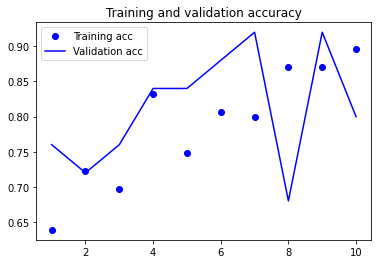

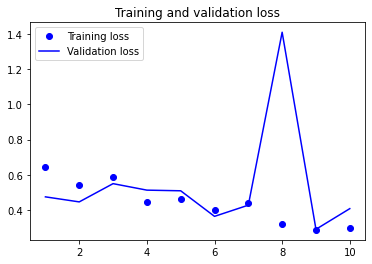

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
history = model.fit_generator(train_generator,steps_per_epoch=31,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=5)

model.save('YES_NO_Tumor_2.h5')


Epoch 1/30
31/31 [==============================] - 1s 41ms/step - loss: 0.2499 - acc: 0.9032 - val_loss: 0.5297 - val_acc: 0.9200
Epoch 2/30
31/31 [==============================] - 1s 35ms/step - loss: 0.1956 - acc: 0.9355 - val_loss: 0.2548 - val_acc: 0.8400
Epoch 3/30
31/31 [==============================] - 1s 42ms/step - loss: 0.1426 - acc: 0.9613 - val_loss: 0.0531 - val_acc: 0.8800
Epoch 4/30
31/31 [==============================] - 1s 36ms/step - loss: 0.1595 - acc: 0.9548 - val_loss: 0.0406 - val_acc: 0.8000
Epoch 5/30
31/31 [==============================] - 1s 40ms/step - loss: 0.1077 - acc: 0.9613 - val_loss: 0.0587 - val_acc: 0.8000
Epoch 6/30
31/31 [==============================] - 1s 35ms/step - loss: 0.1047 - acc: 0.9742 - val_loss: 0.1156 - val_acc: 0.9600
Epoch 7/30
31/31 [==============================] - 1s 42ms/step - loss: 0.0671 - acc: 0.9806 - val_loss: 1.1218 - val_acc: 0.8400
Epoch 8/30
31/31 [==============================] - 1s 36ms/step - loss: 0.0930 - a

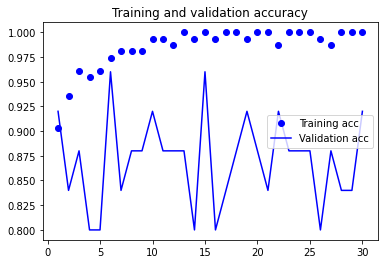

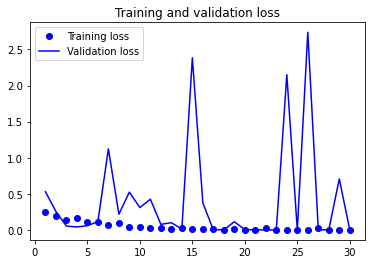

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###Copy models in Drive 

In [ ]:
!cp '/content/YES_NO_Tumor_1.h5' -r '/content/drive/My Drive/MachineLearing/brain_tumor_dataset'

In [ ]:
!cp '/content/YES_NO_Tumor_2.h5' -r '/content/drive/My Drive/MachineLearing/brain_tumor_dataset'

#Making the dataset bigger by using shifting and random rotation of images

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers



Using TensorFlow backend.


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Lets make the datagenerator!

In [20]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                             fill_mode='nearest')

###Here we can see some of the transformed images

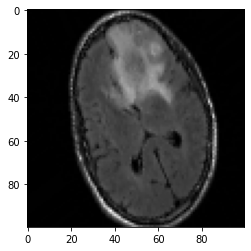

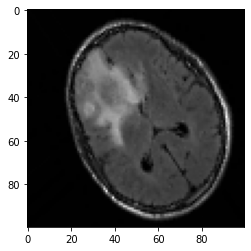

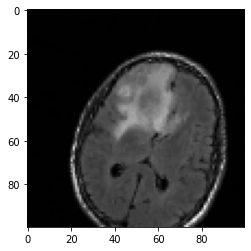

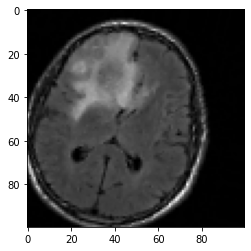

In [21]:
from keras.preprocessing import image
fnames = [os.path.join(train_yes_dir, fname) for fname in os.listdir(train_yes_dir)]
img_path = fnames[3]
#print(img_path)
img = image.load_img(img_path, target_size=(100, 100))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)


i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
    plt.show()

## now we compile the model with new datagenerator

In [22]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [28]:

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100, 100),
                                                    batch_size=128,
                                                    class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(100,100),batch_size=32
                                                      ,class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=60,epochs=20,
                              validation_data=validation_generator,validation_steps=3
                               ,verbose=0)



Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


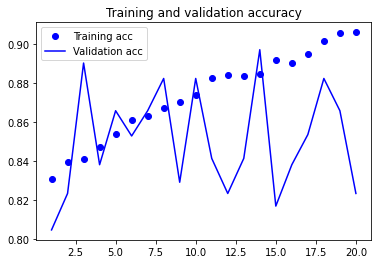

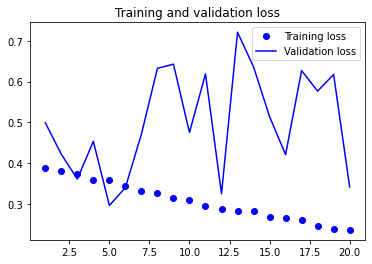

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/MachineLearing/brain_tumor_dataset/Yes_and_NO_small_3.h5')

# 2nd method : Using a pretrained convnet

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False, 
input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 6s 0us/step


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

b_dir='/content/drive/My Drive/MachineLearing/brain_tumor_dataset'


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 5



### creating a list from images


In [ ]:
X_yes=[]
for img in os.listdir(os.path.join(b_dir+'/yes')):
  fnames=os.path.join(b_dir+'/yes/'+img)
  X_yes+=[np.array(image.load_img(fnames,target_size=(100,100)))]
X_yes=np.array(X_yes)
print(X_yes.shape)

(155, 100, 100, 3)


In [ ]:
X_no=[]
for img in os.listdir(os.path.join(b_dir+'/no')):
  fnames=os.path.join(b_dir+'/no/'+img)
  X_no+=[np.array(image.load_img(fnames, target_size=(100,100)))]

X_no=np.array(X_no)
print(X_no.shape)

(154, 100, 100, 3)


In [ ]:
X = np.concatenate( (X_yes, X_no) )
X.shape

### we consider Y=0 for MRI images with tumor
### we consider Y=1 for MRI images with tumor
### Here we create the Y list:

Y = [0]*len(X_yes)+[1]*len(X_no)
np.savez_compressed('X',X=X, Y=Y )

### the X's and Y's should be arranged randomly in the list
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

print(X.shape)


(309, 100, 100, 3)


In [ ]:
### we can see that the X's are numpy arrays and are prepaired to be presented to the model
X[10]

array([[[ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [ 43,  43,  43],
        [ 41,  41,  41],
        [ 30,  30,  30]],

       [[ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [173, 173, 173],
        [ 28,  28,  28],
        [ 36,  36,  36]],

       [[ 30,  30,  30],
        [ 31,  31,  31],
        [ 29,  29,  29],
        ...,
        [158, 158, 158],
        [ 33,  33,  33],
        [ 23,  23,  23]],

       ...,

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25],
        ...,
        [161, 161, 161],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25],
        ...,
        [161, 161, 161],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25],
        ...,
        [161, 161, 161],
        [ 31,  31,  31],
        [ 30,  30,  30]]

In [ ]:
data = np.load('X.npz')
data['X'].shape

(309, 100, 100, 3)

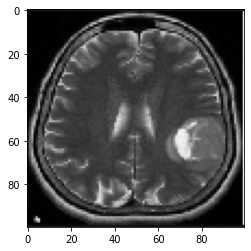

In [ ]:
# np.array(X_yes).shape
plt.imshow(np.array(data['X'][152]))
# np.array(data['X'][168])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255.,
                                   shear_range=0.2,
                                  #  zoom_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=True, 
                                   rotation_range=180, 
                                   validation_split=0.25)

train_generator = datagen.flow(X, Y,                                   
                               batch_size=batch_size,
                               shuffle=True, 
                               subset='training')

val_generator = datagen.flow(X, Y ,                                  
                               batch_size=batch_size,
                               shuffle=True, 
                               subset='validation')


### Using a simple NN (without pre-trained part)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

n_w, n_h, n_c = X[0].shape

model = models.Sequential()
model.add(layers.Flatten(input_shape=(n_w , n_h,  n_c) ))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840128   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,856,769
Trainable params: 3,856,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
stp_epch = 50
history = model.fit(train_generator,  
                    validation_data=val_generator,
                    verbose=1, 
                    epochs=20)

Epoch 1/20
47/47 [==============================] - 1s 20ms/step - loss: 5.8063e-08 - accuracy: 0.5431 - val_loss: 6.3475e-08 - val_accuracy: 0.4286
Epoch 2/20
47/47 [==============================] - 1s 17ms/step - loss: 5.8063e-08 - accuracy: 0.5474 - val_loss: 6.3475e-08 - val_accuracy: 0.5714
Epoch 3/20
47/47 [==============================] - 1s 17ms/step - loss: 5.8063e-08 - accuracy: 0.5733 - val_loss: 6.3475e-08 - val_accuracy: 0.5455
Epoch 4/20
47/47 [==============================] - 1s 17ms/step - loss: 5.8063e-08 - accuracy: 0.5216 - val_loss: 6.3475e-08 - val_accuracy: 0.4675
Epoch 5/20
47/47 [==============================] - 1s 16ms/step - loss: 5.8063e-08 - accuracy: 0.5474 - val_loss: 6.3475e-08 - val_accuracy: 0.5455
Epoch 6/20
47/47 [==============================] - 1s 17ms/step - loss: 5.8063e-08 - accuracy: 0.5431 - val_loss: 6.3475e-08 - val_accuracy: 0.5455
Epoch 7/20
47/47 [==============================] - 1s 17ms/step - loss: 5.8063e-08 - accuracy: 0.5302 - v

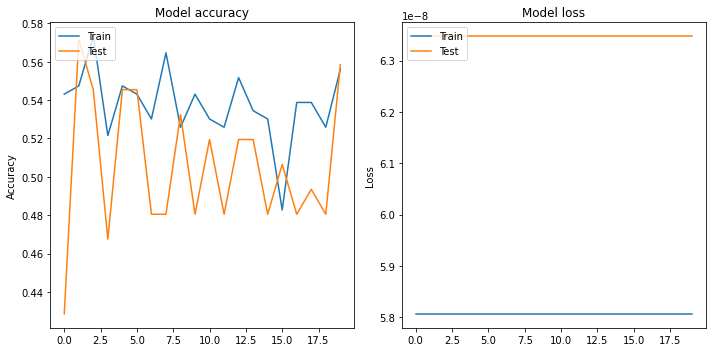

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

###now we use pretrained part

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(n_w, n_h, n_c))
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
conv_base.predict(X).shape

(309, 3, 3, 512)

In [ ]:
# len(X)
X_enc = conv_base.predict(X).reshape(len(X), -1)
# X_enc = conv_base.predict(X)
X_enc.shape

(309, 4608)

In [ ]:
# X.shape
X_enc[3]

array([0.       , 0.       , 5.7674923, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [ ]:
# del(enc_datagen)

## EXACTLY LIKE THE BOOK

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 1,180,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=2e-5),
  metrics=['acc'])
history = model.fit_generator(
  train_generator,
  # steps_per_epoch=20,
  epochs=100,
  validation_data=val_generator,
  validation_steps=10)



Epoch 1/100
47/47 [==============================] - 1s 27ms/step - loss: 0.4649 - acc: 0.7974 - val_loss: 0.4815 - val_acc: 0.8200
Epoch 2/100
47/47 [==============================] - 1s 23ms/step - loss: 0.4492 - acc: 0.8060 - val_loss: 0.5344 - val_acc: 0.7200
Epoch 3/100
47/47 [==============================] - 1s 23ms/step - loss: 0.4366 - acc: 0.8233 - val_loss: 0.4723 - val_acc: 0.8000
Epoch 4/100
47/47 [==============================] - 1s 23ms/step - loss: 0.4244 - acc: 0.8060 - val_loss: 0.4489 - val_acc: 0.8000
Epoch 5/100
47/47 [==============================] - 1s 23ms/step - loss: 0.4217 - acc: 0.8276 - val_loss: 0.4366 - val_acc: 0.7800
Epoch 6/100
47/47 [==============================] - 1s 24ms/step - loss: 0.3819 - acc: 0.8405 - val_loss: 0.4772 - val_acc: 0.7600
Epoch 7/100
47/47 [==============================] - 1s 23ms/step - loss: 0.3817 - acc: 0.8448 - val_loss: 0.4795 - val_acc: 0.8200
Epoch 8/100
47/47 [==============================] - 1s 24ms/step - loss: 0.

In [ ]:
import matplotlib.pyplot as plt

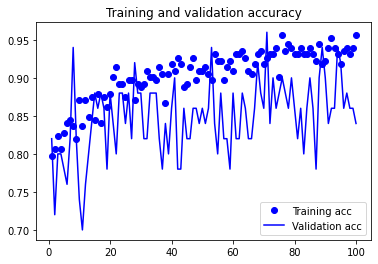

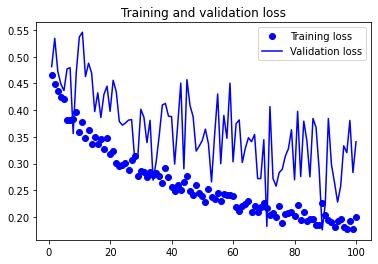

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

0


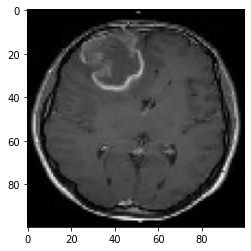

In [ ]:
 m=154
 n=90
plt.imshow(np.array(X[m]))
print(Y[m])

1


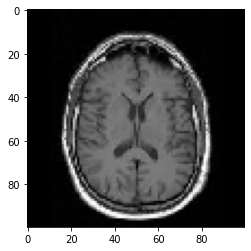

In [ ]:

plt.imshow(np.array(X[n]))

print(Y[n])

In [ ]:
X_pre=np.array([X[m],X[n]])
# X_pre.shape

model.predict(X_pre)

array([[6.7631595e-10],
       [1.0000000e+00]], dtype=float32)

## THE REMAINING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

enc_datagen = ImageDataGenerator(rescale=1./255.,
                                  #  shear_range=0.2,
                                  # #  zoom_range=0.2,
                                  #  horizontal_flip=True, 
                                  #  vertical_flip=True, 
                                  #  rotation_range=180, 
                                   validation_split=0.25)

enc_train_generator = datagen.flow(X_enc, Y,                                   
                               batch_size=batch_size,
                               shuffle=True, 
                               subset='training')

enc_val_generator = datagen.flow(X_enc, Y ,                                  
                               batch_size=batch_size,
                               shuffle=True, 
                               subset='validation')


ValueError: ignored

In [ ]:
yf = conv_base.layers[-1]
conv_base.layers[-1].output_shape

(None, 3, 3, 512)

In [ ]:
model = models.Sequential()
# model.add(layers.Flatten(input_shape=conv_base.layers[-1].output_shape[1:] ))
model.add(layers.Dense(128, activation='relu', 
                       input_shape=(None, 3*3*512) ))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, None, 128)         589952    
_________________________________________________________________
dense_4 (Dense)              (None, None, 128)         16512     
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           129       
Total params: 606,593
Trainable params: 606,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
stp_epch = 50
history = model.fit(train_generator, 
                    # steps_per_epoch=stp_epch, 
                    validation_data=val_generator,
                    # validation_steps=10, 
                    # callbacks=my_callbacks, 
                    verbose=1, 
                    epochs=20)

# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/20


ValueError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

ImageDataGenerator()
# train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
#                                    height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
#                                    horizontal_flip=True,)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100, 100),
#                                                     batch_size=128,
#                                                     class_mode='binary')
# validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(100,100),batch_size=32
#                                                       ,class_mode='binary')

# history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
#                               validation_data=validation_generator,validation_steps=3
#                                ,verbose=0)



In [ ]:
X = conv_base.predict(datagen.flow_from_directory(
      train_dir,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary'))

X.shape

In [ ]:
`train_features, train_labels = extract_features(train_dir, 200)
validation_features, validation_labels = extract_features(validation_dir, 50)
test_features, test_labels = extract_features(test_dir, 59)

Found 200 images belonging to 2 classes.


TypeError: ignored